# FROG TESTING

heres where all the random testing is gonna go for frog stuff for now.

in the future you will make seperate juypter lab files for different things. but now just seperate diff ideas with a markdown cell


In [160]:
import numpy as np
import cv2 as cv #opencv - for reading in images
# import os
import data_processing as dp
import scipy.interpolate as intp
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
%matplotlib inline

In [2]:
# fignum = 1
# chose_f = c_trc_f[201]*h2th
# chose_d = c_trc_d[527]*s2fs
# b_leg = '$\\tau$={d: .1f}'.format(d=chose_d)
# c_leg = '$\omega$={c:.3f} THz'.format(c=chose_f)
# figtitle = 'Fig {}:'.format(fignum) + ' Measured FROG Trace'
# fig = plt.figure(figsize=(6,6));
# gs = fig.add_gridspec(2,2,width_ratios=(7,2),height_ratios=(2,7),left=.1,right=.9,bottom=.1,top=.9,wspace=.1,hspace=.15)
# ax = fig.add_subplot(gs[1,0])
# ax_x = fig.add_subplot(gs[0,0],sharex=ax) # constant delay
# ax_y = fig.add_subplot(gs[1,1],sharey=ax) # constant freq, swap x vs y position for this one
# ax_x.tick_params(axis='x',labelbottom=False)
# ax_y.tick_params(axis='y',labelleft=False)
# ax.pcolormesh(c_trc_f*h2th,c_trc_d*s2fs,c_pic,cmap='hot')
# ax.axvline(c_trc_f[201]*1.e-15,c='w',ls='--');
# ax.axhline(c_trc_d[527]*1.e15,c='w',ls='--');
# ax.set_xlabel('Frequency [THz]');
# ax.set_ylabel('Delay [fs]');
# ax_x.plot(c_trc_f*h2th,c_pic[527,:],c='k',label=b_leg)
# ax_x.legend()
# ax_x.set_ylabel('I [cts]')
# ax_y.plot(c_pic[:,201],c_trc_d*s2fs,c='k',label=c_leg)
# ax_y.legend()
# ax_y.set_xlabel('I [cts]')
# fig.suptitle(figtitle);
# ax.set_title('(A)',loc='left',pad=6.)
# ax.set_title('$I_{FROG}(\omega_i,\\tau_j)$')
# ax_y.set_title('(C)',loc='left')
# ax_x.set_title('(B)',loc='left')
# plt.show();
# fig.savefig('test.png',dpi=300)

In [3]:
# constants
c = 2.99e8 # speed of light in vac [m/s]
# factors for plotting, b/c im working in m and sec
h2th = 1.e-15 # Hz to THz
m2nm = 1.e9 # m to nm
s2fs = 1.e15 # s to fs

In [4]:
# def find_ind(arr,val):
#     'finds the index of arr (Nx1) that matches closest to val, note values in arrays in questions are in m,s, etc'
#     # will want an assert to ensure that val is within arr
#     within = ((val<arr[0])&(val>arr[-1]))|((val>arr[0])&(val<arr[-1]))
#     assert(within)
#     dx = arr[1] - arr[0]
#     dist = val - arr[0]
#     ind = int(dist//dx)
#     return ind

In [5]:
# def get_med(trace,d_arr,f_arr,bnd_val):
#     'median filter that takes in the stuff above and returns the median, using within a function for mem allocation purposes'
#     # do index array for each guy
#     bnd_ind_d = np.array([find_ind(trc_d,bnd_val[0]),find_int(trc_d,bnd_val[1])])
#     bnd_ind_f = np.array([find_ind(trc_f,bnd_val[2]),find_int(trc_f,bnd_val[3])]) # indices of interest
#     # do an if to ensre that both guys are in order
#     if (bnd_ind_d[0]>bnd_ind_d[1]):
#         bnd_ind_d = bnd_ind_d[::-1]
#     if (bnd_ind_f[0]>bnd_ind_f[1]):
#         bnd_ind_f = bnd_ind_f[::-1]
#     # fun fact, python passes objects into the functions so if you pass in a mutable object defined globally into the function and modify it, (as long as its not a redefinition)
#     # it will be keep that change, however this only works for mutable objects :( 
#     # this means imma have to figure out some other way to do this silly thing
#     zone_med = np.zeros(4,dtype=int)
#     zone_med[:2] = np.array([np.median(np.hsplit(raw_pic,bnd_ind_f)[::2][i]) for i in range(2)],dtype=int)
#     zone_med[2:] = np.array([np.median(np.vsplit(raw_pic,bnd_ind_d)[::2][i]) for i in range(2)],dtype=int)
#     # np.splits returns a view of a list of arrays so thats why the wacky indexing and list comprehension are required
#     # also this only works for removing a block but np.split will be useful for the boxcar avg
#     med = int(np.median(zone_med))
#     return med

In [6]:
folder = './Raw PHAROS/' 
fname = 'raw_pharos.tif'
cali = {
    'calibration wavelength': 638.453e-9,
    'calibration pixel': 1025,
    'delay per pixel': .1e-15,
    'wavelength per pixel': .414e-9
}
trace,d_arr,w_arr,f_arr = dp.read_trace(folder,fname,cali)

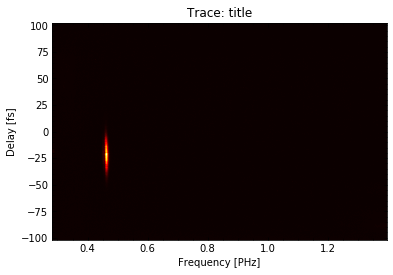

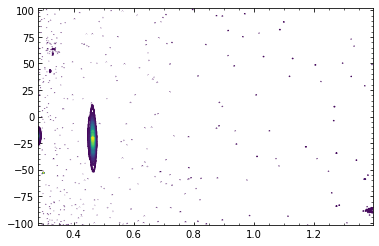

In [7]:
dp.rough_plot(trace,d_arr,f_arr)
plt.figure();
plt.contour(f_arr*h2th,d_arr*s2fs,trace,levels=40);

# biggest issue is that im not sure the calibration is correct

In [8]:
# this value is way too damn high and deff isnt signal since the surrounding values are small af in comparision, 
print('erroneous value trace[492,157] = ',trace[492,157])

erroneous value trace[492,157] =  4095


In [9]:
bnd_val = (-60./s2fs,20./s2fs,.4/h2th,.6/h2th) # the 4 values that block off the signal in the frog trace, ([s],[s],[Hz],[Hz]), low then high
trace = dp.avg_removal(trace,d_arr,f_arr,bnd_val,copy=False)

In [10]:
# do any other weird corrections here i guess
if (trace[492,157]>1000):
    print('mischief managed')
    trace[492,157] = 40
assert(trace.dtype==np.ushort)

mischief managed


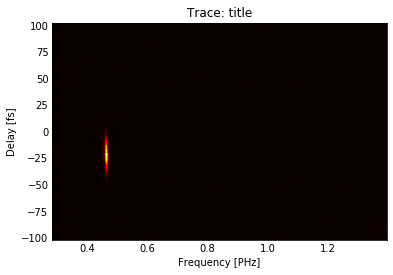

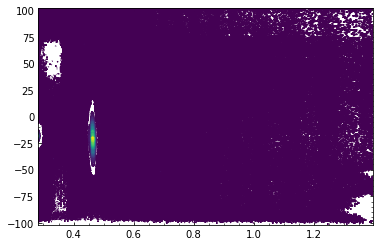

In [11]:
dp.rough_plot(trace,d_arr,f_arr)
plt.figure();
plt.contour(f_arr*h2th,d_arr*s2fs,trace,levels=40);

In [61]:
N = 32
dt,df,M,*_ = dp.sr_FWHM(trace,d_arr,f_arr,N,diag=True)

max along t_curve: -19.959745969711776
max along f_curve: 0.4636569428571871
time indices:  [725 728 734 902]  time vals:  [-29.86458232 -29.56443576 -28.96414265 -12.15593552]
freq indices:  [ 995 1024]  freq vals:  [0.46011059 0.46877555]
Dt =  17.308451392281388 Df =  0.008664957682846251
M =  2.1907222470753847 dt =  7.900796833276412 df =  0.003955297251586308


In [62]:
# technically for PG frog w gauss pulses but idfk how to get it for arb pulses with SHG frog
print('dt>',(4.5*17.3)/N)
print('dt<',1./(6.3*.00866))

dt> 2.4328125000000003
dt< 18.32911763627699


In [63]:
# print('min freq',f_arr[0]*h2th)
# print('max freq',f_arr[-1]*h2th)
print(dt*N/2*s2fs)
print(df*N/2*h2th)

126.41274933242259
0.06328475602538093


2 ways to handle this:

just let it happen: just pad either direction with zeros, i assume this will be useful as having zeros anywhere is good, but honestly it feels wrong so im not sure if its the play, it will also be much slower, however if its just barely out of bounds, lets allow it but i think then you might just wanna do it urself maybe

pad during frog: so if this ish is right, then i really dont need to do much in the way of sampling, so frog can go way faster, and then during the frog algorithm i can pad the shit like trebino says so it doesnt look fucked

basically the only thing i cant do is pretend to do a fine sampling, and then cut N down to a diff size

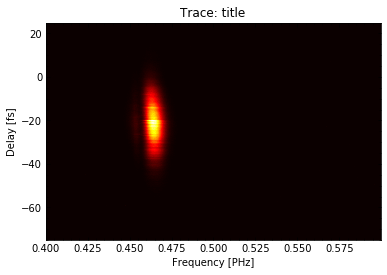

In [18]:
cwvl = np.array([550.,750.])*1.e-9 # wvl to keep in picture [m]
cdelay = np.array([-75.,25])*1.e-15 # delay to keep in pic [s]
cfreq = np.array([.4,.6])/h2th
crp = (cdelay[0],cdelay[1],cfreq[0],cfreq[1])
c_trace,cd_arr,cf_arr = dp.man_crop(trace,d_arr,f_arr,crp,plot=True)

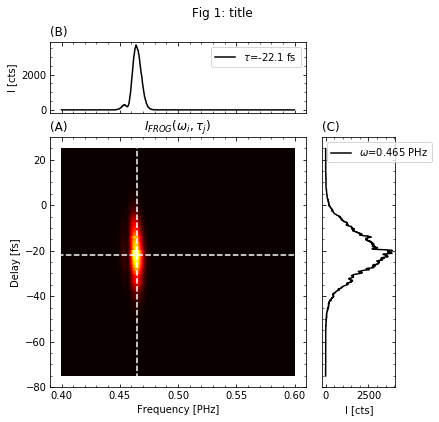

In [19]:
d_val = cd_arr[dp.find_ind(cd_arr,-22./s2fs)]
f_val = cf_arr[dp.find_ind(cf_arr,.465/h2th)]
dp.nice_plot(c_trace,cd_arr,d_val,cf_arr,f_val)

In [20]:
print(c_trace.shape,cd_arr.shape,cf_arr.shape)
print(c_trace[np.max(c_trace,axis=1).argmax(),:].argmax())
print(np.max(c_trace,axis=0).argmax())

(1000, 602) (1000,) (602,)
248
248


In [21]:
c_trace[:,np.max(c_trace,axis=0).argmax()].argmax()

551

In [145]:
N = 32
# index with max value
t_max_ind = np.max(c_trace,axis=1).argmax()
f_max_ind = np.max(c_trace,axis=0).argmax()
# create I(omega) and I(tau) arrays with max indices
t_curve = c_trace[:,f_max_ind]
f_curve = c_trace[t_max_ind,:]
# find half max for both, make splines just cuz itll be easier to get the values
t_spl = intp.InterpolatedUnivariateSpline(cd_arr,(t_curve.astype(float)-(np.max(t_curve.astype(float))/2.)))
t_ind = np.array([dp.find_ind(cd_arr,t_spl.roots()[i]) for i in range(len(t_spl.roots()))])
f_spl = intp.InterpolatedUnivariateSpline(cf_arr,(f_curve.astype(float)-(np.max(f_curve.astype(float))/2.)))
f_ind = np.array([dp.find_ind(cf_arr,f_spl.roots()[i]) for i in range(len(f_spl.roots()))])
# delete splines after this?
print('indices',t_ind,f_ind)
# now avg if there are more than 2 roots
if (len(t_ind)>2):
    lt = np.mean(cd_arr[t_ind[t_ind<t_max_ind]])
    rt = np.mean(cd_arr[t_ind[t_ind>t_max_ind]])
# else: else just let lt,rt be the right vals
if (len(f_ind)>2):
    lf = np.mean(cf_arr[f_ind[f_ind<f_max_ind]])
    rf = np.mean(cf_arr[f_ind[f_ind>f_max_ind]])
else:
    lf = cf_arr[f_ind.min()]
    rf = cf_arr[f_ind.max()]
print(lt,rt)
# now actually create Dt and M and Dv
Dt = np.abs(rt - lt) # temporal FWHM [s]
Df = np.abs(rf - lf) # spectral FWHM [Hz]
print('Dt=',Dt*s2fs,'Df=',Df*h2th)
M = np.sqrt(Dt*N*Df) # factor that Trebino uses for equal spacing btwn temporal and spectral pnts in FROG
dt = Dt/M
df = 1./(N*dt)
print('M=',M,'dt=',dt*s2fs,'df=',df*h2th) # if not returning these, at least print
# testing to see how this program's spacing and arrays compare to linspace
test_d = np.linspace(cd_arr[0],cd_arr[-1],N)
test_f = np.linspace(cf_arr[0],cf_arr[-1],N)
print('testing w linspace',np.diff(test_d)[0]*s2fs,h2th*np.diff(test_f)[0])
# actually make arrays as ordained by trebino
f_trace = np.zeros((N,N),dtype=c_trace.dtype) # f for final as this should go into frog after
fd_arr = np.zeros(N)
ff_arr = np.zeros(N)
# fill em, let mid of arr be the max val and then space on both sides
fd_arr[N//2] = cd_arr[t_max_ind]
ff_arr[N//2] = cf_arr[f_max_ind]
print('center vals: ',s2fs*cd_arr[t_max_ind],h2th*cf_arr[f_max_ind])
fd_arr[:N//2] = np.array([cd_arr[t_max_ind]-dt*(i+1) for i in range(N//2)])[::-1]
fd_arr[(N//2 + 1):] = np.array([cd_arr[t_max_ind]+dt*(i+1) for i in range(N//2 -1)])
ff_arr[:N//2] = np.array([cf_arr[f_max_ind]-df*(i+1) for i in range(N//2)])[::-1]
ff_arr[(N//2 + 1):] = np.array([cf_arr[f_max_ind]+df*(i+1) for i in range(N//2 -1)])
print('edges of fd_arr: ',fd_arr[0]*s2fs,fd_arr[-1]*s2fs)
print('edges of ff_arr: ',ff_arr[0]*h2th,ff_arr[-1]*h2th)
# fill f_trace with spline
trc_spl = intp.RectBivariateSpline(d_arr,f_arr,trace)

indices [452 455 461 629] [236 265]
-2.9464386907669764e-14 -1.2155935515388376e-14
Dt= 17.308451392281388 Df= 0.008664957682846251
M= 2.1907222470753847 dt= 7.900796833276412 df= 0.003955297251586308
testing w linspace 3.2241549395653797 0.006440584139188375
center vals:  -19.959745969711776 0.4636569428571871
edges of fd_arr:  -146.37249530213438 98.55220652943441
edges of ff_arr:  0.40037218683180614 0.5229864016309818


In [146]:
a = trc_spl(test_d,test_f,grid=True)
print(a)

[[-6.66133815e-16  1.45036684e-02  3.28562660e+00 ...  2.43743079e-03
  -2.84983046e-02  9.02056208e-17]
 [ 6.39260578e+00  8.12995195e-01  8.24143570e-01 ...  1.49299144e+00
   9.41448189e-02  7.89359633e-01]
 [ 4.21299923e+00 -7.09088206e-02  4.44373243e-01 ...  5.42794120e-01
   1.97239087e+00  9.64885000e-01]
 ...
 [ 1.80986046e+00 -9.73035286e-02  2.70447830e-01 ...  9.91814702e-01
   2.04928510e-01  1.06882410e-01]
 [ 8.44041352e-01  2.82502274e+00 -1.63453714e-01 ... -3.05575707e-01
   1.87751466e+00  2.57413945e-01]
 [ 1.00000000e+00  1.82202841e+00  5.80869877e-02 ...  3.46828435e+00
   3.17168003e-02  3.00000000e+00]]


In [147]:
b = trc_spl(fd_arr,ff_arr).astype(int)
print(b)

[[18 17 15 ... 19 16 17]
 [18 17 15 ... 19 16 17]
 [18 17 15 ... 19 16 17]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  1  0]
 [ 2  1  0 ...  0 -2  0]]


In [148]:
n2p = False # need to pad (n2p) if it becomes true will either pull an assert error or signal padding is gonna need to happen
# create indexing for padding or just set as 1st and last index of final arrays
if (fd_arr[0]<d_arr[0]):
    n2p = True
    ld = dp.find_ind(fd_arr,d_arr[0])
else:
    ld = 0
if (fd_arr[-1]>d_arr[-1]):
    n2p = True
    rd = dp.find_ind(fd_arr,d_arr[-1])
else:
    rd = len(fd_arr)
if (ff_arr[0]<f_arr[0]):
    n2p = True
    lf = dp.find_ind(ff_arr,f_arr[0])
else:
    lf = 0
if (ff_arr[-1]>f_arr[-1]):
    n2p = True
    rf = dp.find_ind(ff_arr,f_arr[-1])
else:
    rf = len(ff_arr)

In [149]:
b[b<0] = 0
b[:ld,:] = 0
b[rd:,:] = 0
b[:,:lf] = 0
b[:,rf:] = 0
# b[:ld,:lf] = 0
# b[rd:,rf:] = 0

In [163]:
print(b)
print(b.max(),b.min(),b.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 1 0]
 [2 1 0 ... 0 0 0]]
4024 0 (32, 32)


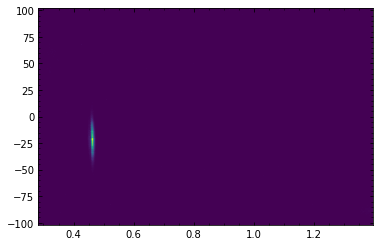

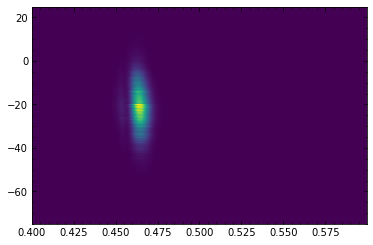

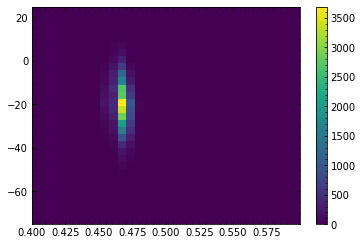

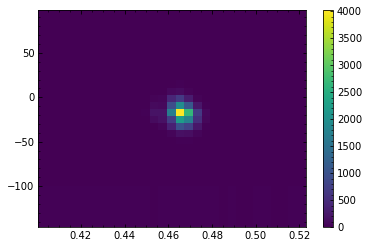

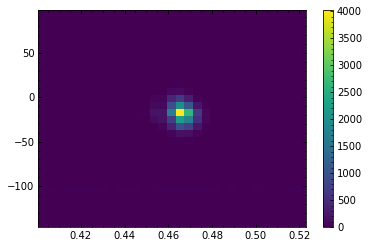

In [151]:
plt.figure();
plt.pcolormesh(f_arr*h2th,d_arr*s2fs,trc_spl(d_arr,f_arr,grid=True).astype(np.ushort));
plt.figure();
plt.pcolormesh(cf_arr*h2th,cd_arr*s2fs,trc_spl(cd_arr,cf_arr,grid=True).astype(np.ushort));
fig,ax = plt.subplots();
pcm = ax.pcolormesh(test_f*h2th,test_d*s2fs,a);
fig.colorbar(pcm,ax=ax);
fig,ax = plt.subplots();
pcm = ax.pcolormesh(ff_arr*h2th,fd_arr*s2fs,trc_spl(fd_arr,ff_arr).astype(int));
fig.colorbar(pcm,ax=ax);
fig,ax = plt.subplots();
pcm = ax.pcolormesh(ff_arr*h2th,fd_arr*s2fs,b);
fig.colorbar(pcm,ax=ax);

check reciprocal and calc, cuz obvs dt*N is correct

In [21]:
1/(6.3*.00866)

18.32911763627699

are our pulses transform limited? and if so what does that really mean?

also are our pulses have a specific shape they are going for?

idea: if we want do to trebinos sampling, fit to a funct (defualt gauss), and then pull the FWHM from there to get sampling rate

hell you dont even need to fit it if your going for $\tau_{FWHM}$ and $\omega_{FWHM}$, so maybe lets do that

to use trebinos idea of equal sampling spacing, want ratio of delay/freq step size to the assoc FWHM, so

$\delta \tau = \frac{\Delta \tau^{FWHM}_p}{M}$ and $\delta \nu = 1/(N \delta \tau)$ with $M = \sqrt{\Delta \tau_p * N * \Delta \nu_p}$

In [ ]:
def FWHM_samp(trace,d_arr,f_arr,pic_dim=256):
    'takes in trace and assoc arrays and returns new trace+arrays with inputted size and equal sampling rate according to Trebino on pg 215 eqn 10.8'
    # want to use cropped + processed trace, advise that you follow Trebino's FSR rules
    # could ask for chose_d,chose_f, or could use np.max
    # steps, find max val in time and freq space, use find_ind to find half of val on both sides of guy, calc dudes, here N=pic_dim
    # index with max value
    t_max_ind = np.max(trace,axis=1).argmax()
    f_max_ind = np.max(trace,axis=0).argmax()
    # create I(omega) and I(tau) arrays with max indices
    t_curve = trace[:,f_max_ind]
    f_curve = trace[t_max_ind,:]
    # find half max for both
    lt_ind = 

### Image processing

start by taking the data from the spectrograph and turning it into the standard plots that are the FROG inputs

what functions do we want:

     - read in spectrograph and calibration files, then output the processed trace, and the processed I vs delay and S vs wvl/freq plots
     
         - process meaning any changes to the temporal or spectral spacing to make frog input easier, so making trace matrix NxN, or centering the spectral data on the carrier freq for FFT stuff
         
         - would want user input for amount of processing done (little for basic frog, but specific stuff for GP or others)
     
     - read in spectrograph and calibration files then save processed image as a picture and NxM matrix, and the processed temporal and spectral intensities 

current programs I need:

    - read in raw pic and calibration data and outputs raw pic, and raw trace with delay, freq, and wvl arrays 
    - read in raw trace, delay, and freq, input crop, optional delay and freq spacing, output the cropped graph with cropped delay and freq arrays
    - read in cropped trace, delay and freq, input freq and delay, output 3 nice graphs at specified freq and delay
        - might also want to save, output, etc the center freq for fft stuff
    - read in cropped trace, delay and freq, input new pic dimensions, output 3 graphs and 3 adjusted arrays
        - will want to have a contour plot on hand for next part
    - read in crop+adj trace, delay, and freq, input boxcar size and any specifications about how/where to avg, output 3 graphs and crop+adj+processed (CAP) trace 
    - read CAP trace and CA delay/freq arrays and save data as text files

In [22]:
# start with reading in the image
# assuming function will stay in parent folder of all data folders (same as liam)
folder = './Raw PHAROS/' 
fname = 'raw_pharos.tif'
# function input: file name (including path)
raw_pic = cv.imread(folder+fname,cv.IMREAD_UNCHANGED) # -1 flag is to leave unchanged
# the orientation of the matrix vs the picture is flipped, does it need to be flipped back??
# confirm that spectrogram is delays(x) and wvl(y) 
# b/c that is opposite convention of trebino's frog, but does make sense in contxt of image
# find and read documentation on spectrometer, princeton optics isoplane 160 
# also need detector specs too

In [23]:
# next step is to take in the calibration data and turn it into delay and wvl
# function input: some sort of data structure that holds the calibration data (dict or maybe just a txt file)
# data needed: calibration pix wvl (wvl of a horz pix) [pix] / delay/vert pix [s/pix] / wvl/horz pix [m/pix]
# SWITCHED FROM USING 'calibration data.txt' (cuz it was weird) to 'raw PHAROS Autocorrelation spectrum' it atleast has same wvl range
# ^ but doesnt have even spaced stuff so just taking an avg of the spacings
# as far as i know, delays just have 0 at the middle
cali_wvl = 638.453e-9 # [m]
cali_pix = 1025 # [pix]
dpp = .1e-15 # delay-per-pixel [s/pix]
wpp = .414e-9 # wvl-per-pixel [m/pix]

# now want to be able to make traces have delay vs wvl and freq rather than pixels
# DONT assume the raw pic is sym
# need if for if vert/horz pix size is even/odd (currently have even setup)
trc_d = np.linspace(-raw_pic.shape[0]/2.,raw_pic.shape[0]/2.,raw_pic.shape[0])*dpp # trace delay array [s]
leftw = cali_wvl - cali_pix*wpp
rightw = cali_wvl + (raw_pic.shape[1]-cali_pix)*wpp
trc_w = np.linspace(leftw,rightw,raw_pic.shape[1]) # trace wvl array [m]
trc_f = np.linspace(c/leftw,c/rightw,raw_pic.shape[1]) # trace freq array [Hz]
# should the center of the pulse be at 0 delay????
# regardless of having nonsense will want to crop data

# function input: times and wvls you would like cropped from trace, want bot left and top right, min/max delay + wvl, dont assume cropping makes sym
# crop input should be min and max of wvl and delay and are both array: crop_wvl,crop_delay
# should be 2 funct, one crops and shows pics, can turn changing trace into NxN on/off
#  ^ the final that just saves requires the changing of trace dimensions
cwvl = np.array([550.,750.])*1.e-9 # wvl to keep in picture [m]
cdelay = np.array([-75.,25])*1.e-15 # delay to keep in pic [s]
cfreq = np.array([.8,.9])/h2th
# # # create cropped trace arrays
# cf = (trc_f>=cfreq[1])&(trc_f<=cfreq[0])
# ct = (trc_d>=cdelay[0])&(trc_d<=cdelay[1])
# c_trc_d = trc_d[ct]
# # c_trc_w = trc_w[cw]
# c_trc_f = trc_f[cf]
# c_pic = np.zeros((len(c_trc_d),len(c_trc_f)))
# # c_pic = raw_pic[ct,:]
# # c_pic = raw_pic[:,cw]
# # c_pic = raw_pic[ct,:]
# # c_pic = c_pic[:,cw]
# # # is there any adjustments needed to make for the actual intensity values (liam makes the min value 0)????

In [27]:
crp_ind_d = np.array([find_ind(trc_d,cdelay[i]) for i in range(2)])
crp_ind_f = np.array([find_ind(trc_f,cfreq[i]) for i in range(2)])
if (crp_ind_d[0]>crp_ind_d[1]):
    crp_ind_d = crp_ind_d[::-1]
if (crp_ind_f[0]>crp_ind_f[1]):
    crp_ind_f = crp_ind_f[::-1]
# preallocate arrays
cd_arr = np.zeros(np.diff(crp_ind_d))
cf_arr = np.zeros(np.diff(crp_ind_f))
c_trace = np.zeros((len(cd_arr),len(cf_arr)))
print(cfreq)
print(crp_ind_d,crp_ind_f)
cd_arr = trc_d[crp_ind_d[0]:crp_ind_d[1]]
cf_arr = trc_f[crp_ind_f[0]:crp_ind_f[1]]
c_trace = raw_pic[crp_ind_d[0]:crp_ind_d[1],crp_ind_f[0]:crp_ind_f[1]]
print(c_trace.shape)

[8.e+14 9.e+14]
[ 273 1273] [ 911 1095]
(1000, 184)


In [15]:
# testing noise reduction algorithms
N = np.power(np.array([2.]),np.arange(2.,11.))
print(N)
print(N**2 * np.log(N))

[   4.    8.   16.   32.   64.  128.  256.  512. 1024.]
[2.21807098e+01 1.33084259e+02 7.09782713e+02 3.54891356e+03
 1.70347851e+04 7.94956638e+04 3.63408749e+05 1.63533937e+06
 7.26817498e+06]


In [7]:
# next would be to do any sort of processing
# currently all i can tell is adjusting spacing, cropping, removing background so that all next
# it seems like unless i do basic frog, making the trace NxN is important
# removing bkgnd is important in basic frog because its sensitive to fall apart at noise, but how to remove?
# maybe contour plot could help remove or determine what to remove
# trebino has plenty to say about processing as well
# current ideas: 2-d boxcar avg
# 2d boxcar: seperate NxN trace into smaller MxM boxcars of trace, take avg and std,
# ^ box with max and surounding boxes remain unchanged, avg the avg of all other boxes and that is the noise, subt num from trace
# ^^ use contour to find what boxes to use

boxcar is a good idea, however if you use the I($\omega$) and I($\tau$) plots as a ref you can create a mask of the array where the signal is and then avg or median filter everywhere else

https://stackoverflow.com/questions/16856788/slice-2d-array-into-smaller-2d-arrays

https://towardsdatascience.com/image-filters-in-python-26ee938e57d2#:~:text=1.-,Mean%20Filter,the%20edges%20of%20the%20image.

^ talking about image filtering

In [34]:
# def med_filter(trace,d_arr,f_arr,bnd_val):
# #     https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uintc
#     'actual filter funct, ensures no number overflow'
#     med = get_med(trace,d_arr,f_arr,bnd_val)
#     print(med) # only need for diag purposes, delete later
#     float_arr = trace.astype(float,copy=False) # dont create a copy, because we will return it to int at the end

71


In [21]:
bnd_val = (-60./s2fs,20./s2fs,.8/h2th,.9/h2th) # the 4 values that block off the signal in the frog trace, ([s],[s],[Hz],[Hz]), low then high
med = get_med(raw_pic,trc_d,trc_f,bnd_val)
print(med)
# testing that not creating a copy will work, will want to restart kernal after this to have a fresh raw_pic
raw_pic = raw_pic.astype(float,copy=False)
print(raw_pic)
raw_pic -= med
# put all elements < 0 -> = 0
raw_pic[raw_pic<0] = 0.
assert(np.all(raw_pic>=0))
raw_pic = raw_pic.astype('H',copy=False) # 'H' = uint16, which is og dtype
print(raw_pic)

71
[[90. 92. 88. ... 80. 82. 83.]
 [81. 92. 85. ... 79. 81. 78.]
 [86. 84. 85. ... 78. 76. 87.]
 ...
 [66. 73. 76. ... 77. 73. 71.]
 [74. 76. 75. ... 72. 67. 71.]
 [78. 74. 73. ... 84. 80. 76.]]
[[19 21 17 ...  9 11 12]
 [10 21 14 ...  8 10  7]
 [15 13 14 ...  7  5 16]
 ...
 [ 0  2  5 ...  6  2  0]
 [ 3  5  4 ...  1  0  0]
 [ 7  3  2 ... 13  9  5]]


In [25]:
# ref to what i did for get_med function, doesnt run repeatibly because it number overflows b/c issa 16bit int, think gandhi in civ
# bnd_val = (-60./s2fs,20./s2fs,.8/h2th,.9/h2th) # the 4 values that block off the signal in the frog trace, ([s],[s],[Hz],[Hz]), low then high
# # do index array for each guy
# bnd_ind_d = np.array([find_int(trc_d,bnd_val[0]),find_int(trc_d,bnd_val[1])])
# bnd_ind_f = np.array([find_int(trc_f,bnd_val[2]),find_int(trc_f,bnd_val[3])]) # indices of interest
# print(bnd_ind_d,bnd_ind_f)
# # do an if to ensre that both guys are in order
# if (bnd_ind_d[0]>bnd_ind_d[1]):
#     bnd_ind_d = bnd_ind_d[::-1]
# if (bnd_ind_f[0]>bnd_ind_f[1]):
#     bnd_ind_f = bnd_ind_f[::-1]
# print(bnd_ind_d,bnd_ind_f)
# # create mask, not very memory efficent right now, need to think about that, or atleast delete the mask
# # if we make it a function then we can destroy 
# pic_mask = raw_pic
# pic_mask[bnd_ind_d[0]:bnd_ind_d[1],bnd_ind_f[0]:bnd_ind_f[1]] = 0
# pic_mask = pic_mask[pic_mask!=0]
# assert(pic_mask.all()) #double check you got rid of the part that was signal
# med = int(np.median(pic_mask)) # this is the background noise
# print(med,np.mean(pic_mask))
# del pic_mask # as of rn this is the best way to preserve mem i know how
# raw_pic = raw_pic - med
# raw_pic[raw_pic<0] = 0 # no neg values
# assert(np.all(raw_pic>=0)) # ensure there are no neg values

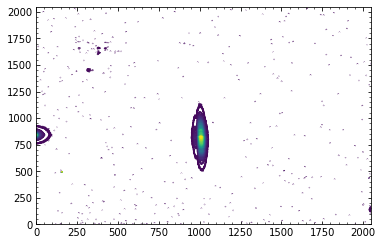

In [22]:
plt.contour(raw_pic,levels=40);
# plt.axhline(s2fs*trc_d[len(trc_d)//num_box]);
# plt.axhline(s2fs*trc_d[2*len(trc_d)//num_box]);

In [23]:
# finally would be to save the plots and data

In [24]:
c_pic.shape

(1000, 483)

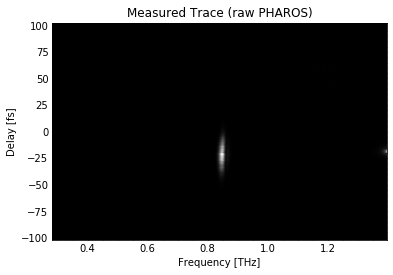

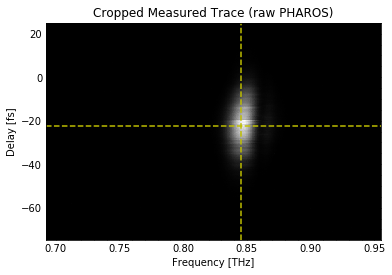

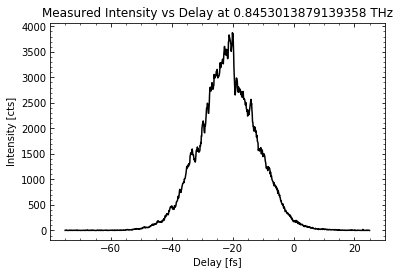

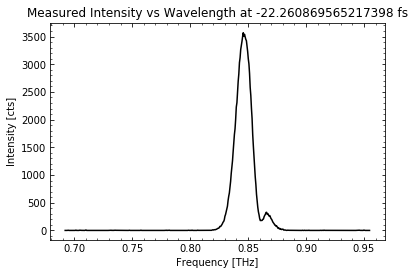

In [28]:
# graphs we may want to include
# include horz/vert line to show where the I vs delay or I vs freq plot comes from
# raw pic
plt.figure();
plt.pcolormesh(trc_f*1.e-15,trc_d*1.e15,raw_pic,cmap='gray');
plt.xlabel('Frequency [THz]');
plt.ylabel('Delay [fs]');
plt.title('Measured Trace (raw PHAROS)');
# cropped raw pic
plt.figure();
plt.pcolormesh(c_trc_f*1.e-15,c_trc_d*1.e15,c_pic,cmap='gray');
plt.xlabel('Frequency [THz]');
plt.ylabel('Delay [fs]');
plt.title('Cropped Measured Trace (raw PHAROS)');
# function input: delay and wvl wanted for I vs wvl and I vs delay plots (respectively)
# ^when func produces plots have it be a 2x2 subplot w/ zoomed processed trace in top left, top right and bot left are intensity plots, unzoomed in bot right
plt.axvline(c_trc_f[201]*1.e-15,c='y',ls='--');
plt.axhline(c_trc_d[527]*1.e15,c='y',ls='--');
# intensity vs delay
# will want to swap x and y axis in final version
plt.figure();
plt.plot(c_trc_d*1.e15,c_pic[:,201],c='k');
plt.xlabel('Delay [fs]');
plt.ylabel('Intensity [cts]');
plt.title('Measured Intensity vs Delay at '+str(c_trc_f[201]*1.e-15)+' THz');
# intensity vs freq
plt.figure();
plt.plot(c_trc_f*1.e-15,c_pic[527,:],c='k');
plt.xlabel('Frequency [THz]');
plt.ylabel('Intensity [cts]');
plt.title('Measured Intensity vs Wavelength at '+str(c_trc_d[527]*1.e15)+' fs');

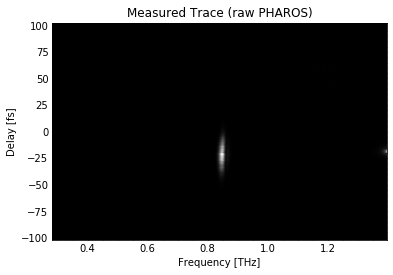

In [26]:
# raw pic
plt.figure();
plt.pcolormesh(trc_f*1.e-15,trc_d*1.e15,raw_pic,cmap='gray');
plt.xlabel('Frequency [THz]');
plt.ylabel('Delay [fs]');
plt.title('Measured Trace (raw PHAROS)');